In [1]:
# Import dependencies 
from sklearn import tree
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import data
df = pd.read_csv("../../NRD 2013 (machine learning).csv")
df.head()

,index,age,aweekend,died,discwt,dispuniform,dmonth,dqtr,drg,drgver,...,_Iage_group_1,_Iage_group_2,_Inew_cc_in_1,_Inew_cc_in_2,_Ipayer_2,_Ipayer_3,_Ipayer_4,_Izipinc_qr_2,_Izipinc_qr_3,_Izipinc_qr_4
0,0,89,1,0.0,1.071937,5.0,3,1,372,30,...,0,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,1,89,1,0.0,1.071937,1.0,6,2,853,30,...,0,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0
2,2,89,0,0.0,1.071937,5.0,9,3,853,30,...,0,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,48,0,0.0,3.063669,1.0,6,2,330,30,...,1,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0
4,4,65,0,0.0,1.919980,1.0,5,2,387,30,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0


In [3]:
# List all of the column names
print(df.columns.values)

['index' 'age' 'aweekend' 'died' 'discwt' 'dispuniform' 'dmonth' 'dqtr'
 'drg' 'drgver' 'drg_nopoa' 'dx1' 'dx2' 'dx3' 'dx4' 'dx5' 'dx6' 'dx7'
 'dx8' 'dx9' 'dx10' 'dx11' 'dx12' 'dx13' 'dx14' 'dx15' 'dx16' 'dx17'
 'dx18' 'dx19' 'dx20' 'dx21' 'dx22' 'dx23' 'dx24' 'dx25' 'dxccs1' 'dxccs2'
 'dxccs3' 'dxccs4' 'dxccs5' 'dxccs6' 'dxccs7' 'dxccs8' 'dxccs9' 'dxccs10'
 'dxccs11' 'dxccs12' 'dxccs13' 'dxccs14' 'dxccs15' 'dxccs16' 'dxccs17'
 'dxccs18' 'dxccs19' 'dxccs20' 'dxccs21' 'dxccs22' 'dxccs23' 'dxccs24'
 'dxccs25' 'elective' 'female' 'hcup_ed' 'hosp_nrd' 'key_nrd' 'los' 'mdc'
 'mdc_nopoa' 'nchronic' 'ndx' 'necode' 'npr' 'nrd_daystoevent'
 'nrd_stratum' 'nrd_visitlink' 'orproc' 'pay1' 'pl_nchs' 'pr1' 'pr2' 'pr3'
 'pr4' 'pr5' 'pr6' 'pr7' 'pr8' 'pr9' 'pr10' 'pr11' 'pr12' 'pr13' 'pr14'
 'pr15' 'prccs1' 'prccs2' 'prccs3' 'prccs4' 'prccs5' 'prccs6' 'prccs7'
 'prccs8' 'prccs9' 'prccs10' 'prccs11' 'prccs12' 'prccs13' 'prccs14'
 'prccs15' 'rehabtransfer' 'resident' 'samedayevent' 'totchg' 'year'
 'zip

In [4]:
# Check the top rows
df.head()

,index,age,aweekend,died,discwt,dispuniform,dmonth,dqtr,drg,drgver,...,_Iage_group_1,_Iage_group_2,_Inew_cc_in_1,_Inew_cc_in_2,_Ipayer_2,_Ipayer_3,_Ipayer_4,_Izipinc_qr_2,_Izipinc_qr_3,_Izipinc_qr_4
0,0,89,1,0.0,1.071937,5.0,3,1,372,30,...,0,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,1,89,1,0.0,1.071937,1.0,6,2,853,30,...,0,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0
2,2,89,0,0.0,1.071937,5.0,9,3,853,30,...,0,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,48,0,0.0,3.063669,1.0,6,2,330,30,...,1,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0
4,4,65,0,0.0,1.919980,1.0,5,2,387,30,...,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0


In [5]:
# Make a copy of the dataframe
df_copy = df.copy()

In [6]:
# Check the back end of the data
df_copy.tail()

,index,age,aweekend,died,discwt,dispuniform,dmonth,dqtr,drg,drgver,...,_Iage_group_1,_Iage_group_2,_Inew_cc_in_1,_Inew_cc_in_2,_Ipayer_2,_Ipayer_3,_Ipayer_4,_Izipinc_qr_2,_Izipinc_qr_3,_Izipinc_qr_4
94493,94493,44,0,0.0,1.669010,6.0,6,2,331,30,...,1,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0
94494,94494,44,0,0.0,1.669010,1.0,8,3,346,30,...,1,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0
94495,94495,44,0,0.0,1.669010,1.0,8,3,393,30,...,1,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0
94496,94496,52,0,0.0,1.863343,1.0,2,1,472,30,...,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
94497,94497,72,1,0.0,1.771707,1.0,2,1,385,30,...,0,1,1,0,0.0,0.0,0.0,1.0,0.0,0.0


In [7]:
# Select specific columns from the copy
df_copy[['nrd_visitlink','ibd_index_hosp', 'dx1', 'new_mi_adm', 'ibd_readm']].head()

,nrd_visitlink,ibd_index_hosp,dx1,new_mi_adm,ibd_readm
0,00017u,1,00845,0,0
1,00017u,0,0389,0,1
2,00017u,0,03842,0,1
3,0004o5,1,5559,0,0
4,000dbz,1,5559,0,0


In [8]:
# Recoding the ibd_readm outcome variable
readm_set = set()
for index, row in df_copy[['nrd_visitlink','ibd_readm']].iterrows():
    if row[1] == 1:
        readm_set.add(row[0])
        
readm_list = list(readm_set)

df_copy.loc[df_copy.nrd_visitlink.isin(readm_list), 'ibd_readm'] = '1'
df_copy[['nrd_visitlink','ibd_index_hosp', 'ibd_readm']].head()

,nrd_visitlink,ibd_index_hosp,ibd_readm
0,00017u,1,1
1,00017u,0,1
2,00017u,0,1
3,0004o5,1,0
4,000dbz,1,1


In [9]:
# Check the recoded variables
df_copy[['nrd_visitlink', 'pay1', 'ibd_index_hosp', 'ibd_readm']].head()

,nrd_visitlink,pay1,ibd_index_hosp,ibd_readm
0,00017u,1.0,1,1
1,00017u,1.0,0,1
2,00017u,1.0,0,1
3,0004o5,3.0,1,0
4,000dbz,1.0,1,1


In [10]:
# Number of index hospitalizations
index_hosp_counts = df_copy['ibd_index_hosp'].value_counts()
index_hosp_counts

1    47402
0    47096
Name: ibd_index_hosp, dtype: int64

In [11]:
# Number of readmissions within six months
readm_counts = df_copy['ibd_readm'].value_counts()
readm_counts

1    64373
0    30125
Name: ibd_readm, dtype: int64

In [12]:
# Filter the data so that only patients with an index hospitalizations are in a DataFrame
readm_data_df = df_copy.loc[df_copy["ibd_index_hosp"] == 1, :]

# Check to ensure the filter worked correctly
readm_data_df["ibd_index_hosp"].count()

47402

In [13]:
print(readm_data_df.columns.values)

['index' 'age' 'aweekend' 'died' 'discwt' 'dispuniform' 'dmonth' 'dqtr'
 'drg' 'drgver' 'drg_nopoa' 'dx1' 'dx2' 'dx3' 'dx4' 'dx5' 'dx6' 'dx7'
 'dx8' 'dx9' 'dx10' 'dx11' 'dx12' 'dx13' 'dx14' 'dx15' 'dx16' 'dx17'
 'dx18' 'dx19' 'dx20' 'dx21' 'dx22' 'dx23' 'dx24' 'dx25' 'dxccs1' 'dxccs2'
 'dxccs3' 'dxccs4' 'dxccs5' 'dxccs6' 'dxccs7' 'dxccs8' 'dxccs9' 'dxccs10'
 'dxccs11' 'dxccs12' 'dxccs13' 'dxccs14' 'dxccs15' 'dxccs16' 'dxccs17'
 'dxccs18' 'dxccs19' 'dxccs20' 'dxccs21' 'dxccs22' 'dxccs23' 'dxccs24'
 'dxccs25' 'elective' 'female' 'hcup_ed' 'hosp_nrd' 'key_nrd' 'los' 'mdc'
 'mdc_nopoa' 'nchronic' 'ndx' 'necode' 'npr' 'nrd_daystoevent'
 'nrd_stratum' 'nrd_visitlink' 'orproc' 'pay1' 'pl_nchs' 'pr1' 'pr2' 'pr3'
 'pr4' 'pr5' 'pr6' 'pr7' 'pr8' 'pr9' 'pr10' 'pr11' 'pr12' 'pr13' 'pr14'
 'pr15' 'prccs1' 'prccs2' 'prccs3' 'prccs4' 'prccs5' 'prccs6' 'prccs7'
 'prccs8' 'prccs9' 'prccs10' 'prccs11' 'prccs12' 'prccs13' 'prccs14'
 'prccs15' 'rehabtransfer' 'resident' 'samedayevent' 'totchg' 'year'
 'zip

In [14]:
# Testing additional features for correlation
# dx_list = []
# for x in range (1,26):
#     dx_list.append(f'dx{x}')

# readm_data_df['d'] = readm_data_df[dx_list].isin(['438']).any(axis=1).astype(int)

# readm_data_df.head()
# readm_data_df['d'].unique()

In [15]:
# List of all the variables in the dataset
['age',
 'female',
 'los',
 'aweekend',
 'elective',
 'orproc',
 'hosp_urban_rural_location',
 'payer',
 'zipinc_qrtl',
 'severe_IBD_hospitalization',
 'cm_aids',
 'cm_alcohol',
 'cm_anemdef',
 'cm_arth',
 'cm_bldloss',
 'cm_chf',
 'cm_chrnlung',
 'cm_depress',
 'cm_coag',
 'cm_dm',
 'cm_dmcx',
 'cm_drug',
 'cm_htn_c',
 'cm_hypothy',
 'cm_liver',
 'cm_lymph',
 'cm_lytes',
 'cm_mets',
 'cm_neuro',
 'cm_obese',
 'cm_para',
 'cm_perivasc',
 'cm_psych',
 'cm_pulmcirc',
 'cm_renlfail',
 'cm_tumor',
 'cm_ulcer',
 'cm_valve',
 'cm_wghtloss',
 'diabetes',
 'copd',
 'cm_smoking',
 'blood_transfusion',
 'ibd_procedures',
 'cc_index',
 'new_cc_index',
 'fractures',
 'thromboses',
 'unplanned_adm',
 'pq1_dm_short',
 'pq2_perf_appendix',
 'pq3_dm_long',
 'pq5_copd_asthma',
 'pq7_htn',
 'pq8_chf',
 'pq10_dehydrate',
 'pq11_bacterialpna',
 'pq12_uti',
 'pq13_angina',
 'pq14_diabeteswocomp',
 'pq15_asthma',
 'pq16_dm_amputate',
 'new_mi_adm',
 'new_chf_adm',
 'new_unstableangina_adm',
 'new_arrhythmia_adm',
 'new_cardiacarrest_adm',
 'new_meningitis_adm',
 'new_encephalitis_adm',
 'new_endocarditis_adm',
 'new_pneumonia_adm',
 'new_pyelonephritis_adm',
 'new_osteo_adm',
 'new_septicemia_adm',
 'new_cdiff_adm',
 'new_tb_adm',
 'new_atypicalmyco_adm',
 'new_fungal_adm',
 'new_listeriosis_adm',
 'new_leishmaniasis_adm',
 'new_pcp_adm',
 'chronic_pain',
 'ibd_surgery_adm',
 'frailty_risk_score',
 'frailty_risk_category',
 'frailty_risk_category_index',
 'h_contrl',
 'hosp_bedsize',
 'hosp_ur_teach',
 'hosp_urcat4',
 'prevent_readm',
 'cardiac_adm',
 'cvd_adm',
 'resp_adm',
 'infxn_adm',
 'gu_adm',
 'gi_adm',
 'endo_adm',
 'neuro_adm',
 'malignancies_adm',
 'fracture_adm',
 'thrombosis_adm',
 'ibd_specific_adm',
 'others_adm']

['age',
 'female',
 'los',
 'aweekend',
 'elective',
 'orproc',
 'hosp_urban_rural_location',
 'payer',
 'zipinc_qrtl',
 'severe_IBD_hospitalization',
 'cm_aids',
 'cm_alcohol',
 'cm_anemdef',
 'cm_arth',
 'cm_bldloss',
 'cm_chf',
 'cm_chrnlung',
 'cm_depress',
 'cm_coag',
 'cm_dm',
 'cm_dmcx',
 'cm_drug',
 'cm_htn_c',
 'cm_hypothy',
 'cm_liver',
 'cm_lymph',
 'cm_lytes',
 'cm_mets',
 'cm_neuro',
 'cm_obese',
 'cm_para',
 'cm_perivasc',
 'cm_psych',
 'cm_pulmcirc',
 'cm_renlfail',
 'cm_tumor',
 'cm_ulcer',
 'cm_valve',
 'cm_wghtloss',
 'diabetes',
 'copd',
 'cm_smoking',
 'blood_transfusion',
 'ibd_procedures',
 'cc_index',
 'new_cc_index',
 'fractures',
 'thromboses',
 'unplanned_adm',
 'pq1_dm_short',
 'pq2_perf_appendix',
 'pq3_dm_long',
 'pq5_copd_asthma',
 'pq7_htn',
 'pq8_chf',
 'pq10_dehydrate',
 'pq11_bacterialpna',
 'pq12_uti',
 'pq13_angina',
 'pq14_diabeteswocomp',
 'pq15_asthma',
 'pq16_dm_amputate',
 'new_mi_adm',
 'new_chf_adm',
 'new_unstableangina_adm',
 'new_arrhythmia

In [16]:
# Grab the features
data = readm_data_df[['ibd_readm','age', 'frailty_risk_score', 'los', 'zipinc_qrtl', 'payer', 'hosp_bedsize', 'h_contrl', 'hosp_urcat4', 'hosp_ur_teach', 'cc_index', 'female', 'cm_htn_c', 'ibd_procedures', 'cm_smoking', 'aweekend', 'ibd_specific_adm', 'diabetes', 'cm_depress', 'orproc', 'thromboses']] # score = 62%

# Feature set
cleaned_data = data.dropna(axis='rows')
cleaned_data

,ibd_readm,age,frailty_risk_score,los,zipinc_qrtl,payer,hosp_bedsize,h_contrl,hosp_urcat4,hosp_ur_teach,...,female,cm_htn_c,ibd_procedures,cm_smoking,aweekend,ibd_specific_adm,diabetes,cm_depress,orproc,thromboses
0,1,89,4.7,4,4.0,1.0,3,1,1,1,...,0,1,0,1,1,0,0,0,0,0
3,0,48,0.5,4,3.0,2.0,3,1,2,1,...,1,0,1,1,0,1,0,0,1,0
4,1,65,5.7,5,2.0,1.0,2,2,2,1,...,0,1,0,1,0,1,0,0,0,0
9,0,51,2.8,3,4.0,2.0,2,2,2,1,...,0,0,0,1,0,0,0,0,1,0
10,0,22,3.8,6,2.0,1.0,3,2,2,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94491,0,32,0.0,3,4.0,2.0,2,2,1,1,...,1,0,0,0,1,0,0,0,0,0
94492,0,54,0.0,4,4.0,2.0,3,2,1,1,...,0,0,1,0,0,0,0,0,1,0
94493,1,44,0.0,9,4.0,2.0,3,2,1,1,...,0,0,1,0,0,1,0,0,1,0
94496,0,52,1.5,2,1.0,1.0,3,2,2,0,...,1,1,0,0,0,0,1,1,1,0


In [21]:
# Grab outcome/label names after dropping na's/rows with na's
target = cleaned_data["ibd_readm"]
target_names = ["none", "readmitted"]
target = target.astype('int64')
target

0        1
3        0
4        1
9        0
10       0
        ..
94491    0
94492    0
94493    1
94496    0
94497    0
Name: ibd_readm, Length: 46632, dtype: int64

In [22]:
# Grab feature names after dropping na's/rows with na
cleaned_data_wo_outcome = cleaned_data.drop('ibd_readm', axis=1)
featured_names = cleaned_data_wo_outcome.columns
featured_names

Index(['age', 'frailty_risk_score', 'los', 'zipinc_qrtl', 'payer',
       'hosp_bedsize', 'h_contrl', 'hosp_urcat4', 'hosp_ur_teach', 'cc_index',
       'female', 'cm_htn_c', 'ibd_procedures', 'cm_smoking', 'aweekend',
       'ibd_specific_adm', 'diabetes', 'cm_depress', 'orproc', 'thromboses'],
      dtype='object')

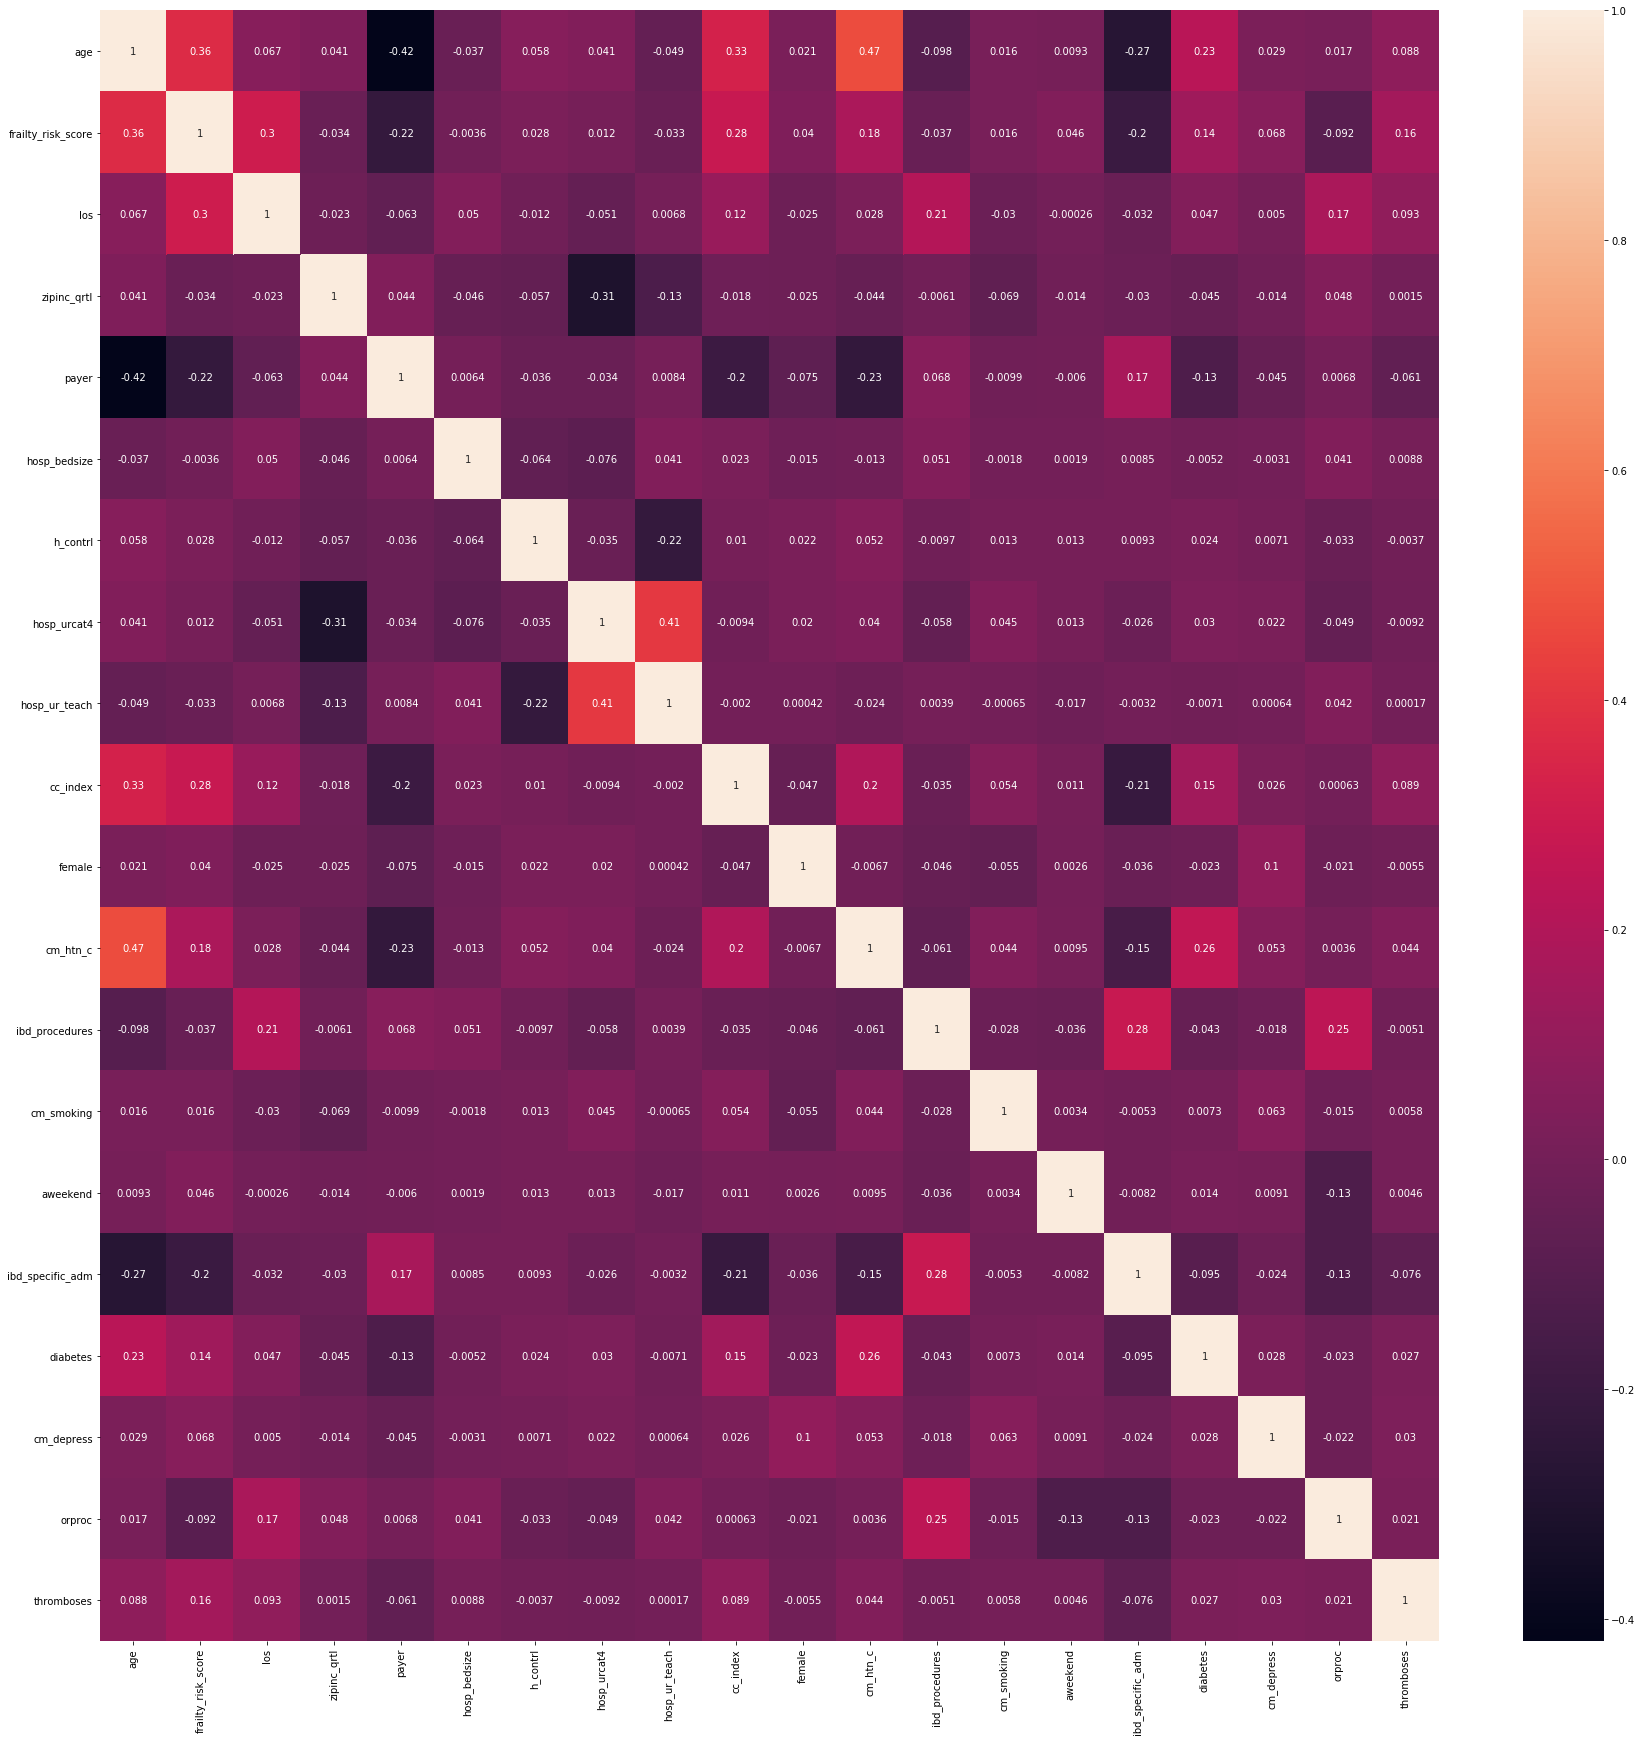

In [23]:
# Correlation matrix
corrMatrix = cleaned_data_wo_outcome.corr()

# Generating a heatmap
import seaborn as sn
import matplotlib.pyplot as plt

# Plot the matrix
fig, ax = plt.subplots(figsize=(30,30))   # Sample figsize in inches
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [24]:
# Check for na values
cleaned_data_wo_outcome.isnull().sum()

age                   0
frailty_risk_score    0
los                   0
zipinc_qrtl           0
payer                 0
hosp_bedsize          0
h_contrl              0
hosp_urcat4           0
hosp_ur_teach         0
cc_index              0
female                0
cm_htn_c              0
ibd_procedures        0
cm_smoking            0
aweekend              0
ibd_specific_adm      0
diabetes              0
cm_depress            0
orproc                0
thromboses            0
dtype: int64

In [25]:
# Set up training and testing datasets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleaned_data_wo_outcome, target, random_state=42)

In [26]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)

print(f'Training Score: {rf.score(X_train, y_train)}')
print(f'Testing Score: {rf.score(X_test, y_test)}')

Training Score: 0.9996282953050838
Testing Score: 0.604134499914222


In [27]:
# Hypertuning parameters
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50, 100, 150, 200],
              'max_depth': [5, 10, 15]}
grid = GridSearchCV(rf,param_grid, verbose=3)

In [28]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=5, n_estimators=50 ....................................
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] ........ max_depth=5, n_estimators=50, score=0.601, total=   0.8s
[CV] max_depth=5, n_estimators=50 ....................................
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[CV] ........ max_depth=5, n_estimators=50, score=0.605, total=   0.8s
[CV] max_depth=5, n_estimators=50 ....................................
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s
[CV] ........ max_depth=5, n_estimators=50, score=0.598, total=   0.8s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ........ max_depth=5, n_estimators=50, score=0.604, total=   0.7s
[CV] max_depth=5, n_estimators=50 ....................................
[CV] ........ max_depth=5, n_estimators=50, score=0.598, to

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=None,
                                              oob_score=False,
                                              ra

In [29]:
# Print the best depth and estimator
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 10, 'n_estimators': 150}
0.6109108287037822


In [30]:
# Check the training and testing scores
print(f'Training Score: {grid.score(X_train, y_train)}')
grid.predict(X_test)
print(f'Testing Score: {grid.score(X_test, y_test)}')

Training Score: 0.7031795047749757
Testing Score: 0.6230914393549494


In [31]:
# Check the feature importance
sorted(zip(rf.feature_importances_, X_train), reverse=True)

[(0.19047141592869157, 'age'),
 (0.1710489524812221, 'frailty_risk_score'),
 (0.11095609377518435, 'los'),
 (0.0639562169507671, 'zipinc_qrtl'),
 (0.049655684958129005, 'cc_index'),
 (0.04407395943705139, 'hosp_bedsize'),
 (0.041311843916925016, 'h_contrl'),
 (0.039051326391984865, 'hosp_urcat4'),
 (0.037480433514761234, 'hosp_ur_teach'),
 (0.03329572915293306, 'payer'),
 (0.03149049999855235, 'female'),
 (0.02694158931619181, 'cm_htn_c'),
 (0.025975290315053072, 'aweekend'),
 (0.025014995196780677, 'cm_smoking'),
 (0.02415697887749518, 'ibd_procedures'),
 (0.022681858339746227, 'ibd_specific_adm'),
 (0.017636340588731675, 'cm_depress'),
 (0.01749943304342439, 'diabetes'),
 (0.01660706074524367, 'orproc'),
 (0.010694297071131271, 'thromboses')]

In [46]:
# Using logistic regression and k-fold validation
from sklearn.linear_model import LogisticRegression
classifier = RandomForestClassifier()
classifier
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
scores = cross_validate(classifier, cleaned_data_wo_outcome, target, cv=10,
                        scoring=('roc_auc', 'precision','recall', 'accuracy'),
                        return_train_score=True)
print(scores)

{'fit_time': array([6.9988296 , 5.88326955, 6.05578089, 6.19097066, 6.22189593,
       6.20594835, 9.48841929, 6.22238851, 9.00500321, 7.03141737]), 'score_time': array([0.46873856, 0.38497257, 0.39893198, 0.5241375 , 0.3779912 ,
       0.42184544, 0.58942223, 0.53987312, 0.41588807, 0.38397598]), 'test_roc_auc': array([0.60404331, 0.60542705, 0.61902248, 0.61143756, 0.61487763,
       0.60860559, 0.59879148, 0.63154427, 0.61225385, 0.61478633]), 'train_roc_auc': array([0.99999838, 0.99999771, 0.99998573, 0.99999857, 0.99999815,
       0.99999561, 0.99999766, 0.99999797, 0.99999873, 0.99999814]), 'test_precision': array([0.50188395, 0.51217656, 0.53448276, 0.51783061, 0.53675345,
       0.52251553, 0.51990632, 0.53936087, 0.52717391, 0.52342606]), 'train_precision': array([0.99948151, 0.99953917, 0.99971192, 0.99971187, 0.99936643,
       0.99953917, 0.9994816 , 0.99953917, 0.99959668, 0.99953909]), 'test_recall': array([0.34507772, 0.34870466, 0.35355106, 0.36132711, 0.36340073,
     

In [35]:
# Creating ROC/AUC chart
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logistic_roc_auc = roc_auc_score(y_test.values, grid.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test.values, grid.predict_proba(X_test)[:,1])

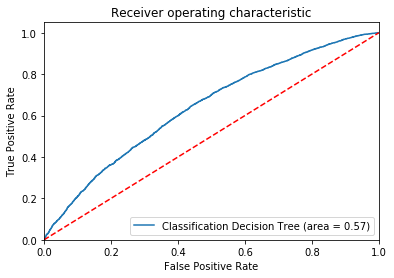

In [36]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label='Classification Decision Tree (area = %0.2f)' % logistic_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Classification_Logisitic_Regression_ROC')
plt.show()

In [37]:
# Trying XGBoost to try and get a better model score
from sklearn import  metrics, model_selection
from xgboost.sklearn import XGBClassifier

In [38]:
# Hypertuning parameters
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': 0.2,
    'silent': 1.0,
    'n_estimators': 100,
    'gamma': 11.25,
    'min_child_weight': 17,
    # 'sub_sample': 5,
    # 'n_thread': 2
}

model = XGBClassifier(**params).fit(X_train, y_train)

[18:38:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [39]:
# use the model to make predictions with the test data
y_pred = model.predict(X_test)
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 4380
Accuracy: 0.62


In [40]:
model.score(X_test,y_test)

0.6242923314462172

In [44]:
# Cross validating XGBoost
# Using logistic regression and k-fold validation
from sklearn.linear_model import LogisticRegression
classifier = XGBClassifier(**params)
classifier
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
scores = cross_validate(classifier, cleaned_data_wo_outcome, target, cv=10,
                        scoring=('roc_auc', 'precision','recall', 'accuracy'),
                        return_train_score=True)
print(scores)

[18:42:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:42:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:42:34] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

In [39]:
# check tpot version
import tpot
print('tpot: %s' % tpot.__version__)

tpot: 0.11.6.post1


In [40]:
# TPOT Classification (AutoML)
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from tpot import TPOTClassifier

In [42]:
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# define search
model = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='accuracy', verbosity=2, random_state=42, n_jobs=-1)
# perform the search
model.fit(X_train, y_train)
# export the best model
model.export('tpot_best_model.py')


Generation 1 - Current best internal CV score: 0.6134938471860687

Generation 2 - Current best internal CV score: 0.6134938471860687

Generation 3 - Current best internal CV score: 0.6139132406720259

Generation 4 - Current best internal CV score: 0.6139132406720259

Generation 5 - Current best internal CV score: 0.6143612355473197

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.1, max_depth=2, min_child_weight=15, n_estimators=100, nthread=1, subsample=0.4)
